In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
crimes_data = pd.read_csv('crimedata.csv')

In [4]:
crimes_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12583965,JF102303,01/03/2022 01:30:00 PM,003XX E 76TH ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True,...,6.0,69,14,1179942.0,1854699.0,2022,01/10/2022 03:51:23 PM,41.756565,-87.616111,"(41.756565176, -87.616111074)"
1,12583949,JF102446,01/03/2022 05:15:00 PM,021XX W 72ND PL,1365,CRIMINAL TRESPASS,TO RESIDENCE,APARTMENT,False,False,...,17.0,67,26,1163445.0,1856564.0,2022,01/10/2022 03:51:23 PM,41.762045,-87.676517,"(41.762044507, -87.676517323)"
2,12583314,JF101736,01/03/2022 01:49:00 AM,024XX S ARCHER AVE,031A,ROBBERY,ARMED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,11.0,60,03,1171749.0,1887900.0,2022,01/10/2022 03:51:23 PM,41.847856,-87.645163,"(41.84785572, -87.645162578)"
3,12584353,JF103119,01/03/2022 03:00:00 AM,075XX S ESSEX AVE,0810,THEFT,OVER $500,STREET,False,False,...,7.0,43,06,1194171.0,1855517.0,2022,01/10/2022 03:51:23 PM,41.758472,-87.563939,"(41.758472475, -87.563938551)"
4,12584669,JF102858,01/03/2022 12:53:00 PM,044XX S TRUMBULL AVE,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,14.0,58,06,1154121.0,1875045.0,2022,01/10/2022 03:51:23 PM,41.812949,-87.710200,"(41.812949384, -87.710200316)"


In [5]:
crimes_data.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
29981,12634579,JF160345,03/01/2022 12:00:00 PM,012XX W BYRON ST,1330,CRIMINAL TRESPASS,TO LAND,APARTMENT,False,False,...,44.0,6,26,1167111.0,1926026.0,2022,03/08/2022 03:49:42 PM,41.952577,-87.661088,"(41.952576753, -87.661087678)"
29982,12632233,JF161640,03/01/2022 03:00:00 PM,086XX S COLFAX AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,...,7.0,46,06,1194993.0,1848202.0,2022,03/08/2022 03:49:42 PM,41.738379,-87.561167,"(41.738379322, -87.561166634)"
29983,12631112,JF160508,03/01/2022 08:00:00 PM,004XX N WOOD ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,27.0,24,07,1164313.0,1903426.0,2022,03/08/2022 03:49:42 PM,41.890621,-87.672014,"(41.890620703, -87.672013889)"
29984,12630796,JF160104,03/01/2022 06:20:00 PM,001XX E 51ST ST,0560,ASSAULT,SIMPLE,GAS STATION,False,False,...,3.0,40,08A,1178181.0,1871245.0,2022,03/08/2022 03:49:42 PM,41.802009,-87.622063,"(41.8020092, -87.622063199)"
29985,12630458,JF159699,03/01/2022 12:13:00 PM,067XX S ELIZABETH ST,0560,ASSAULT,SIMPLE,CHA APARTMENT,False,False,...,17.0,67,08A,1169148.0,1860172.0,2022,03/08/2022 03:49:42 PM,41.771824,-87.655511,"(41.771823924, -87.655510895)"


In [6]:
crimes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29986 entries, 0 to 29985
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    29986 non-null  int64  
 1   Case Number           29986 non-null  object 
 2   Date                  29986 non-null  object 
 3   Block                 29986 non-null  object 
 4   IUCR                  29986 non-null  object 
 5   Primary Type          29986 non-null  object 
 6   Description           29986 non-null  object 
 7   Location Description  29902 non-null  object 
 8   Arrest                29986 non-null  bool   
 9   Domestic              29986 non-null  bool   
 10  Beat                  29986 non-null  int64  
 11  District              29986 non-null  int64  
 12  Ward                  29984 non-null  float64
 13  Community Area        29986 non-null  int64  
 14  FBI Code              29986 non-null  object 
 15  X Coordinate       

In [7]:
crimes_data = crimes_data.dropna()
crimes_data = crimes_data.reset_index(drop = True)
crimes_data

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12583965,JF102303,01/03/2022 01:30:00 PM,003XX E 76TH ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True,...,6.0,69,14,1179942.0,1854699.0,2022,01/10/2022 03:51:23 PM,41.756565,-87.616111,"(41.756565176, -87.616111074)"
1,12583949,JF102446,01/03/2022 05:15:00 PM,021XX W 72ND PL,1365,CRIMINAL TRESPASS,TO RESIDENCE,APARTMENT,False,False,...,17.0,67,26,1163445.0,1856564.0,2022,01/10/2022 03:51:23 PM,41.762045,-87.676517,"(41.762044507, -87.676517323)"
2,12583314,JF101736,01/03/2022 01:49:00 AM,024XX S ARCHER AVE,031A,ROBBERY,ARMED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,11.0,60,03,1171749.0,1887900.0,2022,01/10/2022 03:51:23 PM,41.847856,-87.645163,"(41.84785572, -87.645162578)"
3,12584353,JF103119,01/03/2022 03:00:00 AM,075XX S ESSEX AVE,0810,THEFT,OVER $500,STREET,False,False,...,7.0,43,06,1194171.0,1855517.0,2022,01/10/2022 03:51:23 PM,41.758472,-87.563939,"(41.758472475, -87.563938551)"
4,12584669,JF102858,01/03/2022 12:53:00 PM,044XX S TRUMBULL AVE,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,14.0,58,06,1154121.0,1875045.0,2022,01/10/2022 03:51:23 PM,41.812949,-87.710200,"(41.812949384, -87.710200316)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29540,12634579,JF160345,03/01/2022 12:00:00 PM,012XX W BYRON ST,1330,CRIMINAL TRESPASS,TO LAND,APARTMENT,False,False,...,44.0,6,26,1167111.0,1926026.0,2022,03/08/2022 03:49:42 PM,41.952577,-87.661088,"(41.952576753, -87.661087678)"
29541,12632233,JF161640,03/01/2022 03:00:00 PM,086XX S COLFAX AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,...,7.0,46,06,1194993.0,1848202.0,2022,03/08/2022 03:49:42 PM,41.738379,-87.561167,"(41.738379322, -87.561166634)"
29542,12631112,JF160508,03/01/2022 08:00:00 PM,004XX N WOOD ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,27.0,24,07,1164313.0,1903426.0,2022,03/08/2022 03:49:42 PM,41.890621,-87.672014,"(41.890620703, -87.672013889)"
29543,12630796,JF160104,03/01/2022 06:20:00 PM,001XX E 51ST ST,0560,ASSAULT,SIMPLE,GAS STATION,False,False,...,3.0,40,08A,1178181.0,1871245.0,2022,03/08/2022 03:49:42 PM,41.802009,-87.622063,"(41.8020092, -87.622063199)"


In [8]:
crimes_data.columns = crimes_data.columns.str.strip()
crimes_data.columns = crimes_data.columns.str.replace(',', '')
crimes_data.columns = crimes_data.columns.str.replace(' ', '_')
crimes_data.columns = crimes_data.columns.str.lower()

In [9]:
crimes_data[crimes_data.duplicated(keep=False)]

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location


In [10]:
crimes_data.drop(['id','case_number','location'],axis=1,inplace=True)


In [11]:
crimes_data

,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude
0,01/03/2022 01:30:00 PM,003XX E 76TH ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True,623,6,6.0,69,14,1179942.0,1854699.0,2022,01/10/2022 03:51:23 PM,41.756565,-87.616111
1,01/03/2022 05:15:00 PM,021XX W 72ND PL,1365,CRIMINAL TRESPASS,TO RESIDENCE,APARTMENT,False,False,735,7,17.0,67,26,1163445.0,1856564.0,2022,01/10/2022 03:51:23 PM,41.762045,-87.676517
2,01/03/2022 01:49:00 AM,024XX S ARCHER AVE,031A,ROBBERY,ARMED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,914,9,11.0,60,03,1171749.0,1887900.0,2022,01/10/2022 03:51:23 PM,41.847856,-87.645163
3,01/03/2022 03:00:00 AM,075XX S ESSEX AVE,0810,THEFT,OVER $500,STREET,False,False,421,4,7.0,43,06,1194171.0,1855517.0,2022,01/10/2022 03:51:23 PM,41.758472,-87.563939
4,01/03/2022 12:53:00 PM,044XX S TRUMBULL AVE,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,821,8,14.0,58,06,1154121.0,1875045.0,2022,01/10/2022 03:51:23 PM,41.812949,-87.710200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29540,03/01/2022 12:00:00 PM,012XX W BYRON ST,1330,CRIMINAL TRESPASS,TO LAND,APARTMENT,False,False,1923,19,44.0,6,26,1167111.0,1926026.0,2022,03/08/2022 03:49:42 PM,41.952577,-87.661088
29541,03/01/2022 03:00:00 PM,086XX S COLFAX AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,423,4,7.0,46,06,1194993.0,1848202.0,2022,03/08/2022 03:49:42 PM,41.738379,-87.561167
29542,03/01/2022 08:00:00 PM,004XX N WOOD ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,1221,12,27.0,24,07,1164313.0,1903426.0,2022,03/08/2022 03:49:42 PM,41.890621,-87.672014
29543,03/01/2022 06:20:00 PM,001XX E 51ST ST,0560,ASSAULT,SIMPLE,GAS STATION,False,False,231,2,3.0,40,08A,1178181.0,1871245.0,2022,03/08/2022 03:49:42 PM,41.802009,-87.622063


In [12]:
crimes_data.isnull().sum()

date                    0
block                   0
iucr                    0
primary_type            0
description             0
location_description    0
arrest                  0
domestic                0
beat                    0
district                0
ward                    0
community_area          0
fbi_code                0
x_coordinate            0
y_coordinate            0
year                    0
updated_on              0
latitude                0
longitude               0
dtype: int64

In [13]:
crimes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29545 entries, 0 to 29544
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  29545 non-null  object 
 1   block                 29545 non-null  object 
 2   iucr                  29545 non-null  object 
 3   primary_type          29545 non-null  object 
 4   description           29545 non-null  object 
 5   location_description  29545 non-null  object 
 6   arrest                29545 non-null  bool   
 7   domestic              29545 non-null  bool   
 8   beat                  29545 non-null  int64  
 9   district              29545 non-null  int64  
 10  ward                  29545 non-null  float64
 11  community_area        29545 non-null  int64  
 12  fbi_code              29545 non-null  object 
 13  x_coordinate          29545 non-null  float64
 14  y_coordinate          29545 non-null  float64
 15  year               

In [14]:
crimes_data.date = pd.to_datetime(crimes_data.date)
crimes_data['day_of_week'] = crimes_data.date.dt.day_name()
crimes_data['month'] = crimes_data.date.dt.month_name()
crimes_data['time'] = crimes_data.date.dt.hour

In [15]:
primary_type_map = {
    ('BURGLARY','MOTOR VEHICLE THEFT','THEFT','ROBBERY') : 'THEFT',
    ('BATTERY','ASSAULT','NON-CRIMINAL','NON-CRIMINAL (SUBJECT SPECIFIED)') : 'NON-CRIMINAL_ASSAULT',
    ('CRIM SEXUAL ASSAULT','SEX OFFENSE','STALKING','PROSTITUTION') : 'SEXUAL_OFFENSE',
    ('WEAPONS VIOLATION','CONCEALED CARRY LICENSE VIOLATION') :  'WEAPONS_OFFENSE',
    ('HOMICIDE','CRIMINAL DAMAGE','DECEPTIVE PRACTICE','CRIMINAL TRESPASS') : 'CRIMINAL_OFFENSE',
    ('KIDNAPPING','HUMAN TRAFFICKING','OFFENSE INVOLVING CHILDREN') : 'HUMAN_TRAFFICKING_OFFENSE',
    ('NARCOTICS','OTHER NARCOTIC VIOLATION') : 'NARCOTIC_OFFENSE',
    ('OTHER OFFENSE','ARSON','GAMBLING','PUBLIC PEACE VIOLATION','INTIMIDATION','INTERFERENCE WITH PUBLIC OFFICER','LIQUOR LAW VIOLATION','OBSCENITY','PUBLIC INDECENCY') : 'OTHER_OFFENSE'
}
primary_type_mapping = {}
for keys, values in primary_type_map.items():
    for key in keys:
        primary_type_mapping[key] = values
crimes_data['primary_type_grouped'] = crimes_data.primary_type.map(primary_type_mapping)

In [16]:
zone_mapping = {
    'N' : 'North',
    'S' : 'South',
    'E' : 'East',
    'W' : 'West'
}
crimes_data['zone'] = crimes_data.block.str.split(" ", n = 2, expand = True)[1].map(zone_mapping)

In [17]:
season_map = {
    ('March','April','May') : 'Spring',
    ('June','July','August') : 'Summer',
    ('September','October','November') : 'Fall',
    ('December','January','February') : 'Winter'
}
season_mapping = {}
for keys, values in season_map.items():
    for key in keys:
        season_mapping[key] = values
crimes_data['season'] = crimes_data.month.map(season_mapping)

In [18]:
loc_map = {
    ('RESIDENCE', 'APARTMENT', 'CHA APARTMENT', 'RESIDENCE PORCH/HALLWAY', 'RESIDENCE-GARAGE',
    'RESIDENTIAL YARD (FRONT/BACK)', 'DRIVEWAY - RESIDENTIAL', 'HOUSE') : 'RESIDENCE',
    
    ('BARBERSHOP', 'COMMERCIAL / BUSINESS OFFICE', 'CURRENCY EXCHANGE', 'DEPARTMENT STORE', 'RESTAURANT',
    'ATHLETIC CLUB', 'TAVERN/LIQUOR STORE', 'SMALL RETAIL STORE', 'HOTEL/MOTEL', 'GAS STATION',
    'AUTO / BOAT / RV DEALERSHIP', 'CONVENIENCE STORE', 'BANK', 'BAR OR TAVERN', 'DRUG STORE',
    'GROCERY FOOD STORE', 'CAR WASH', 'SPORTS ARENA/STADIUM', 'DAY CARE CENTER', 'MOVIE HOUSE/THEATER',
    'APPLIANCE STORE', 'CLEANING STORE', 'PAWN SHOP', 'FACTORY/MANUFACTURING BUILDING', 'ANIMAL HOSPITAL',
    'BOWLING ALLEY', 'SAVINGS AND LOAN', 'CREDIT UNION', 'KENNEL', 'GARAGE/AUTO REPAIR', 'LIQUOR STORE',
    'GAS STATION DRIVE/PROP.', 'OFFICE', 'BARBER SHOP/BEAUTY SALON') : 'BUSINESS',
    
    ('VEHICLE NON-COMMERCIAL', 'AUTO', 'VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)', 'TAXICAB',
    'VEHICLE-COMMERCIAL', 'VEHICLE - DELIVERY TRUCK', 'VEHICLE-COMMERCIAL - TROLLEY BUS',
    'VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS') : 'VEHICLE',
    
    ('AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA', 'CTA PLATFORM', 'CTA STATION', 'CTA BUS STOP',
    'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA', 'CTA TRAIN', 'CTA BUS', 'CTA GARAGE / OTHER PROPERTY',
    'OTHER RAILROAD PROP / TRAIN DEPOT', 'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA',
    'AIRPORT BUILDING NON-TERMINAL - SECURE AREA', 'AIRPORT EXTERIOR - NON-SECURE AREA', 'AIRCRAFT',
    'AIRPORT PARKING LOT', 'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA', 'OTHER COMMERCIAL TRANSPORTATION',
    'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA', 'AIRPORT VENDING ESTABLISHMENT',
    'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA', 'AIRPORT EXTERIOR - SECURE AREA', 'AIRPORT TRANSPORTATION SYSTEM (ATS)',
    'CTA TRACKS - RIGHT OF WAY', 'AIRPORT/AIRCRAFT', 'BOAT/WATERCRAFT', 'CTA PROPERTY', 'CTA "L" PLATFORM',
    'RAILROAD PROPERTY') : 'PUBLIC_TRANSPORTATION',
    
    ('HOSPITAL BUILDING/GROUNDS', 'NURSING HOME/RETIREMENT HOME', 'SCHOOL, PUBLIC, BUILDING',
    'CHURCH/SYNAGOGUE/PLACE OF WORSHIP', 'SCHOOL, PUBLIC, GROUNDS', 'SCHOOL, PRIVATE, BUILDING',
    'MEDICAL/DENTAL OFFICE', 'LIBRARY', 'COLLEGE/UNIVERSITY RESIDENCE HALL', 'YMCA', 'HOSPITAL') : 'PUBLIC_BUILDING',
    
    ('STREET', 'PARKING LOT/GARAGE(NON.RESID.)', 'SIDEWALK', 'PARK PROPERTY', 'ALLEY', 'CEMETARY',
    'CHA HALLWAY/STAIRWELL/ELEVATOR', 'CHA PARKING LOT/GROUNDS', 'COLLEGE/UNIVERSITY GROUNDS', 'BRIDGE',
    'SCHOOL, PRIVATE, GROUNDS', 'FOREST PRESERVE', 'LAKEFRONT/WATERFRONT/RIVERBANK', 'PARKING LOT', 'DRIVEWAY',
    'HALLWAY', 'YARD', 'CHA GROUNDS', 'RIVER BANK', 'STAIRWELL', 'CHA PARKING LOT') : 'PUBLIC_AREA',
    
    ('POLICE FACILITY/VEH PARKING LOT', 'GOVERNMENT BUILDING/PROPERTY', 'FEDERAL BUILDING', 'JAIL / LOCK-UP FACILITY',
    'FIRE STATION', 'GOVERNMENT BUILDING') : 'GOVERNMENT',
    
    ('OTHER', 'ABANDONED BUILDING', 'WAREHOUSE', 'ATM (AUTOMATIC TELLER MACHINE)', 'VACANT LOT/LAND',
    'CONSTRUCTION SITE', 'POOL ROOM', 'NEWSSTAND', 'HIGHWAY/EXPRESSWAY', 'COIN OPERATED MACHINE', 'HORSE STABLE',
    'FARM', 'GARAGE', 'WOODED AREA', 'GANGWAY', 'TRAILER', 'BASEMENT', 'CHA PLAY LOT') : 'OTHER'  
}

loc_mapping = {}
for keys, values in loc_map.items():
    for key in keys:
        loc_mapping[key] = values
crimes_data['loc_grouped'] = crimes_data.location_description.map(loc_mapping)

In [19]:
crimes_data.arrest = crimes_data.arrest.astype(int)
crimes_data.domestic = crimes_data.domestic.astype(int)

In [20]:
crimes_data = crimes_data.dropna()
crimes_data = crimes_data.reset_index(drop = True)

# **5. Data visualization and analysis**

In [21]:
crimes_data_2018 = crimes_data[crimes_data.year == 2018]
crimes_data_2019 = crimes_data[crimes_data.year == 2019]
crimes_data_2020 = crimes_data[crimes_data.year == 2020]

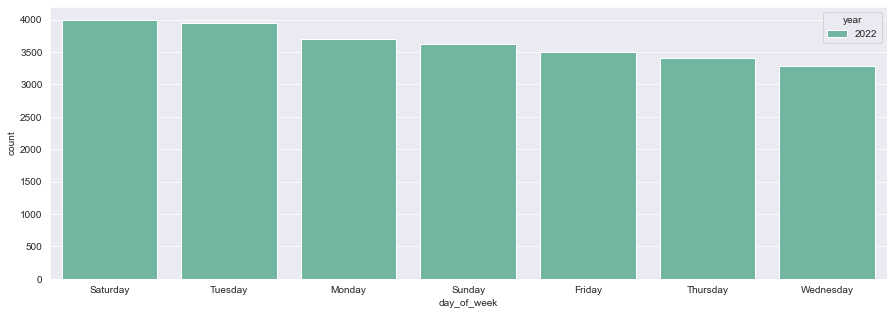

In [22]:
plt.figure(figsize=(15,5))
zone_plot = sns.countplot(data=crimes_data,x='day_of_week',hue='year',order=crimes_data.day_of_week.value_counts().index,palette='Set2')

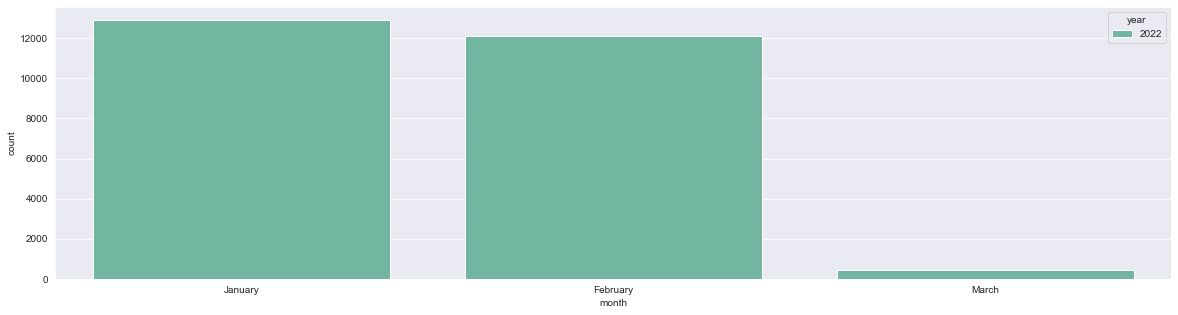

In [23]:
plt.figure(figsize=(20,5))
zone_plot = sns.countplot(data=crimes_data,x='month',hue='year',order=crimes_data.month.value_counts().index,palette='Set2')

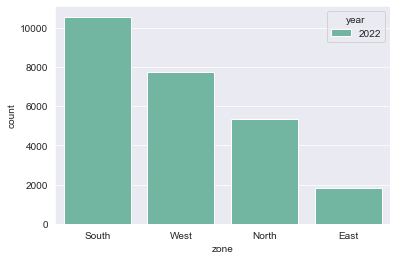

In [24]:
zone_plot = sns.countplot(data=crimes_data,x='zone',hue='year',order=crimes_data.zone.value_counts().index,palette='Set2')

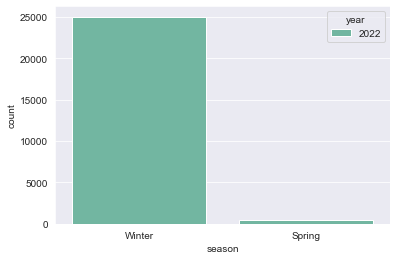

In [25]:
zone_plot = sns.countplot(data=crimes_data,x='season',hue='year',palette='Set2')

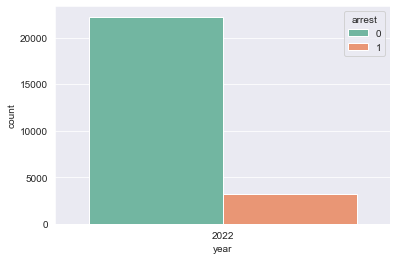

In [26]:
arrest_plot = sns.countplot(data=crimes_data,x='year',hue='arrest',palette='Set2')

Text(0.5, 1.0, 'Crimes by Type of crime')

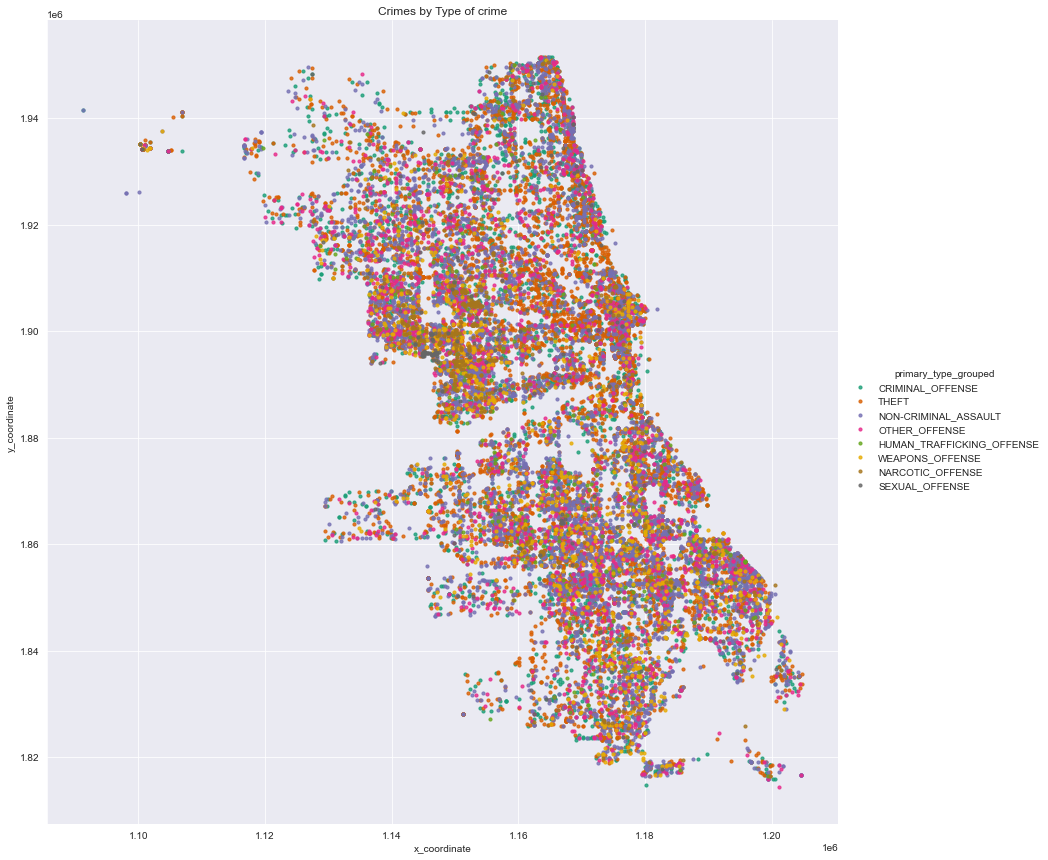

In [27]:
new_crimes_data = crimes_data.loc[(crimes_data['x_coordinate']!=0)]
sns.lmplot('x_coordinate', 
           'y_coordinate',
           data=new_crimes_data[:],
           fit_reg=False, 
           hue="primary_type_grouped",
           palette='Dark2',
           height=12,
           ci=2,
           scatter_kws={"marker": "o", 
                        "s": 10})
ax = plt.gca()
ax.set_title("Crimes by Type of crime")

In [28]:
crimes_data.year = pd.Categorical(crimes_data.year)
crimes_data.time = pd.Categorical(crimes_data.time)
crimes_data.domestic = pd.Categorical(crimes_data.domestic)
crimes_data.arrest = pd.Categorical(crimes_data.arrest)
crimes_data.beat = pd.Categorical(crimes_data.beat)
crimes_data.district = pd.Categorical(crimes_data.district)
crimes_data.ward = pd.Categorical(crimes_data.ward)
crimes_data.community_area = pd.Categorical(crimes_data.community_area)

In [29]:
crimes_data_prediction = crimes_data.drop(['date','block','iucr','primary_type','description','location_description','fbi_code','updated_on','x_coordinate','y_coordinate'],axis=1)

In [30]:
crimes_data_prediction.head()

,arrest,domestic,beat,district,ward,community_area,year,latitude,longitude,day_of_week,month,time,primary_type_grouped,zone,season,loc_grouped
0,0,1,623,6,6.0,69,2022,41.756565,-87.616111,Monday,January,13,CRIMINAL_OFFENSE,East,Winter,PUBLIC_AREA
1,0,0,735,7,17.0,67,2022,41.762045,-87.676517,Monday,January,17,CRIMINAL_OFFENSE,West,Winter,RESIDENCE
2,0,0,421,4,7.0,43,2022,41.758472,-87.563939,Monday,January,3,THEFT,South,Winter,PUBLIC_AREA
3,0,0,821,8,14.0,58,2022,41.812949,-87.710200,Monday,January,12,THEFT,South,Winter,RESIDENCE
4,0,0,723,7,6.0,68,2022,41.771967,-87.648222,Monday,January,19,NON-CRIMINAL_ASSAULT,South,Winter,PUBLIC_AREA


In [31]:
crimes_data_prediction = pd.get_dummies(crimes_data_prediction,drop_first=True)
crimes_data_prediction.head()

,latitude,longitude,arrest_1,domestic_1,beat_112,beat_113,beat_114,beat_121,beat_122,beat_123,...,zone_South,zone_West,season_Winter,loc_grouped_GOVERNMENT,loc_grouped_OTHER,loc_grouped_PUBLIC_AREA,loc_grouped_PUBLIC_BUILDING,loc_grouped_PUBLIC_TRANSPORTATION,loc_grouped_RESIDENCE,loc_grouped_VEHICLE
0,41.756565,-87.616111,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,41.762045,-87.676517,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
2,41.758472,-87.563939,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
3,41.812949,-87.710200,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
4,41.771967,-87.648222,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0


In [32]:
X_train, X_test, y_train, y_test = train_test_split(crimes_data_prediction.drop(['arrest_1'],axis=1),crimes_data_prediction['arrest_1'], test_size=0.25, random_state=42)

#      **i. Gaussian Naive Bayes**

In [33]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [34]:
y_pred = classifier.predict(X_test)

In [35]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[2304 3263]
 [ 187  608]]


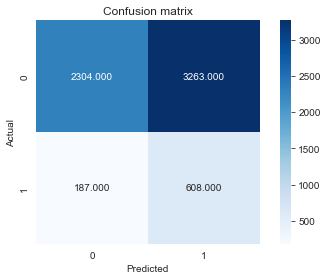

In [36]:
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [37]:
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Precision = ',metrics.precision_score(y_test, y_pred,))
print('Recall = ',metrics.recall_score(y_test, y_pred))
print('F-1 Score = ',metrics.f1_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Error =  0.5422823011631562
Precision =  0.1570653577886851
Recall =  0.7647798742138365
F-1 Score =  0.26060865837976854
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.41      0.57      5567
           1       0.16      0.76      0.26       795

    accuracy                           0.46      6362
   macro avg       0.54      0.59      0.42      6362
weighted avg       0.83      0.46      0.53      6362



In [38]:
model4 = metrics.accuracy_score(y_test, y_pred)

# **ii. Decision Tree**

In [39]:
model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [40]:
y_pred = model.predict(X_test)

In [41]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[5069  498]
 [ 412  383]]


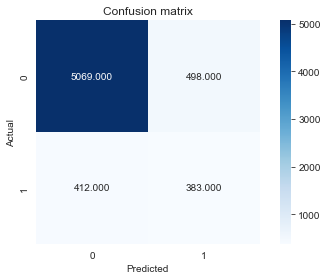

In [42]:
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [43]:
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Precision = ',metrics.precision_score(y_test, y_pred,))
print('Recall = ',metrics.recall_score(y_test, y_pred))
print('F-1 Score = ',metrics.f1_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Error =  0.14303678088651373
Precision =  0.43473325766174803
Recall =  0.4817610062893082
F-1 Score =  0.45704057279236276
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.91      0.92      5567
           1       0.43      0.48      0.46       795

    accuracy                           0.86      6362
   macro avg       0.68      0.70      0.69      6362
weighted avg       0.86      0.86      0.86      6362



In [44]:
model3 = metrics.accuracy_score(y_test, y_pred)

# **iii. Random Forest**

In [45]:
model = RandomForestClassifier(n_estimators = 10,criterion='entropy',random_state=42)

In [46]:
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [47]:
y_pred = model.predict(X_test)

In [48]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[5480   87]
 [ 531  264]]


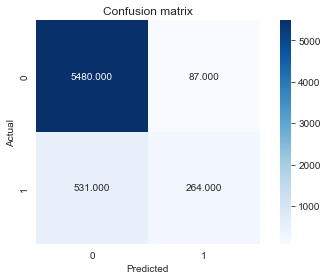

In [49]:
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [50]:
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Precision = ',metrics.precision_score(y_test, y_pred,))
print('Recall = ',metrics.recall_score(y_test, y_pred))
print('F-1 Score = ',metrics.f1_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Accuracy =  0.9028607356177303
Error =  0.09713926438226972
Precision =  0.7521367521367521
Recall =  0.3320754716981132
F-1 Score =  0.46073298429319376
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      5567
           1       0.75      0.33      0.46       795

    accuracy                           0.90      6362
   macro avg       0.83      0.66      0.70      6362
weighted avg       0.89      0.90      0.89      6362



# **iv. Logistic Regression**

In [51]:
classifier = LogisticRegression(random_state=42)

In [52]:
classifier.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [53]:
y_pred = classifier.predict(X_test)

In [54]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[5456  111]
 [ 487  308]]


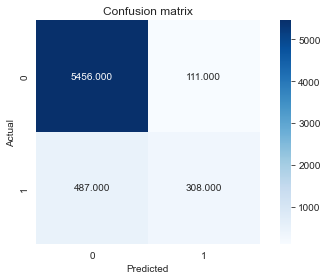

In [55]:
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [56]:
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Precision = ',metrics.precision_score(y_test, y_pred,))
print('Recall = ',metrics.recall_score(y_test, y_pred))
print('F-1 Score = ',metrics.f1_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Error =  0.09399559886828046
Precision =  0.7350835322195705
Recall =  0.38742138364779877
F-1 Score =  0.5074135090609555
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      5567
           1       0.74      0.39      0.51       795

    accuracy                           0.91      6362
   macro avg       0.83      0.68      0.73      6362
weighted avg       0.90      0.91      0.89      6362



In [57]:
model2 =metrics.accuracy_score(y_test, y_pred)

# **8. Hypertuning and final accuracy**

In [58]:
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [59]:
classifier = RandomForestClassifier(n_estimators=10, random_state=42)

In [60]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)

In [61]:
model1 =all_accuracies.max()

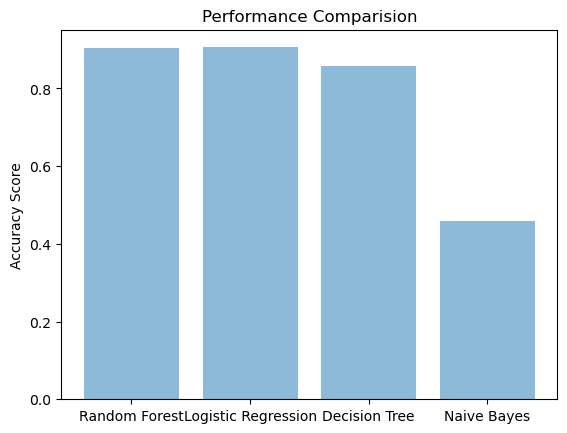

In [62]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Random Forest','Logistic Regression','Decision Tree','Naive Bayes')
y_pos = np.arange(len(objects))
performance = [model1,model2,model3,model4]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Score')
plt.title("Performance Comparision")

plt.show()